<a href="https://colab.research.google.com/github/rohithreddy999/Advance_predictive/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRINCIPAL COMPONENT ANALYSIS (PCA)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Iris.csv', index_col='Id')

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [ ]:
X = df.drop('Species',axis=1)
y = df['Species']

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDataframe

,PC1,PC2
0,-2.816339,0.506051
1,-2.645527,-0.651799
2,-2.879481,-0.321036
3,-2.810934,-0.577363
4,-2.879884,0.670468
...,...,...
145,2.424421,0.377119
146,2.164220,-0.915696
147,2.139796,0.254272
148,2.029480,0.998725


In [ ]:
targetDataframe = df[['Species']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

newDataframe

,PC1,PC2,Species
0,-2.816339,0.506051,Iris-setosa
1,-2.645527,-0.651799,Iris-setosa
2,-2.879481,-0.321036,Iris-setosa
3,-2.810934,-0.577363,Iris-setosa
4,-2.879884,0.670468,Iris-setosa
...,...,...,...
145,2.424421,0.377119,Iris-virginica
146,2.164220,-0.915696,Iris-virginica
147,2.139796,0.254272,Iris-virginica
148,2.029480,0.998725,Iris-virginica


Text(0, 0.5, 'PC2')

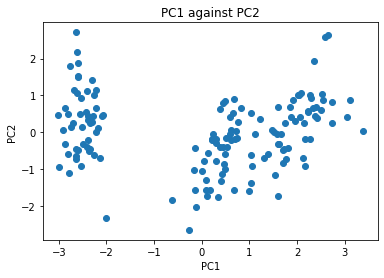

In [ ]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

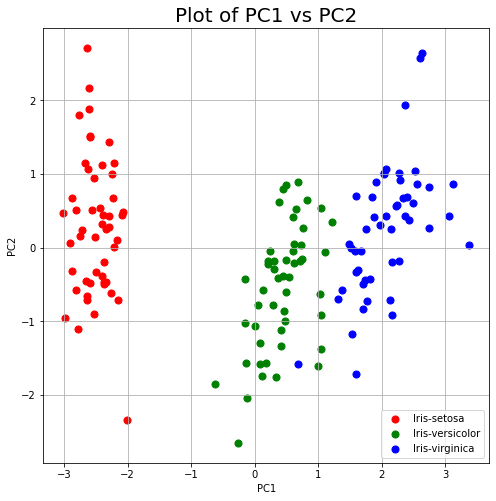

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['Species'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

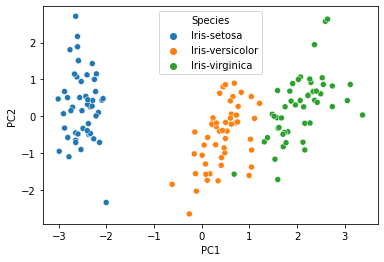

In [ ]:
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=newDataframe);